In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dcm

#librairie crop
import PIL
from PIL import Image

import imageio
import numpy
from matplotlib.pyplot import *

#fitter la gaussienne
import scipy.ndimage
import scipy

#cette commande permet d'afficher les figures ci-dessous et pas une fenetre externe
%matplotlib inline

In [2]:
# FONCTION DE LECTURE D UNE IMAGE:

def readImg(filename):
    ds = dcm.read_file(filename)
    pixSize = [(ds[0x0028,0x0030].value)[1], (ds[0x0028,0x0030].value)[0]]

    try:
        rescaleIntercept = ds[0x0028,0x1052].value
        rescaleSlope = ds[0x0028,0x1053].value
    #pour garder les bonnes valeurs sans arrondissement
    except KeyError:
        rescaleIntercept = 0
        rescaleSlope = 1
    pixarray = ds.pixel_array[:,:].astype(np.float32) * rescaleSlope + rescaleIntercept
    image = pixarray[0,:,:] - pixarray[1,:,:]
    return image, pixSize

In [3]:
# FONCTION D INTERPOLATION

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

In [4]:
# FONCTION QUI RETOURNE LES DEUX POINTS DU PROFIL A 50%

def half_max(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, - half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    lin_interp(x, y, zero_crossings_i[0], half)
    lin_interp(x, y, zero_crossings_i[1], half)
    return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

In [5]:
# FONCTION QUI PERMET DE CROPER L IMAGE

def cropImg(image):
    #créer une matrices avec des zeros
    profilex = np.zeros(1024)
    profiley = np.zeros(1024)
    for i in range(0,1024):
        #sommer le lignes
        profilex = profilex + image[i,:]
        #sommer les colonnes
        profiley = profiley + image[:,i]

    abcisse = np.arange(0, 1024, 1)
    hmx = half_max(abcisse, profilex)
    hmy = half_max(abcisse, profiley)
    fwhm = hmx[1] - hmx[0]
    centerx = fwhm / 2 + hmx[0]
    fwhmy = hmy[1] - hmy[0]
    centery = fwhmy / 2 + hmy[0]

    centerX = round(centerx,0)
    centerY = round(centery,0)

    x1 = int(centerX) - 40
    x2 = int(centerX) + 40
    y1 = int(centerY) - 40
    y2 = int(centerY) + 40
    
    partie = image[y1:y2,x1:x2]
    #plt.title('partie')
    #plt.imshow(partie)
    #plt.show()
    return partie

In [6]:
##### distance de 5cm #####
img0, pixSize = readImg('capuchon 5cm pos1.DCM')
img1, pixSize = readImg('capuchon 5cm pos2.DCM')
img2, pixSize = readImg('capuchon 5cm pos3.DCM')
img3, pixSize = readImg('capuchon 5cm pos4.DCM')
img4, pixSize = readImg('capuchon 5cm pos5.DCM')
##### distance de 10cm #####
img01, pixSize = readImg('capuchon 10cm pos1.DCM')
img11, pixSize = readImg('capuchon 10cm pos2.DCM')
img21, pixSize = readImg('capuchon 10cm pos3.DCM')
img31, pixSize = readImg('capuchon 10cm pos4.DCM')
img41, pixSize = readImg('capuchon 10cm pos5.DCM')
##### distance de 15cm #####
img02, pixSize = readImg('capuchon 15cm pos1.DCM')
img12, pixSize = readImg('capuchon 15cm pos2.DCM')
img22, pixSize = readImg('capuchon 15cm pos3.DCM')
img32, pixSize = readImg('capuchon 15cm pos4.DCM')
img42, pixSize = readImg('capuchon 15cm pos5.DCM')
##### distance de 20cm #####
img03, pixSize = readImg('capuchon 20cm pos1.DCM')
img13, pixSize = readImg('capuchon 20cm pos2.DCM')
img23, pixSize = readImg('capuchon 20cm pos3.DCM')
img33, pixSize = readImg('capuchon 20cm pos4.DCM')
img43, pixSize = readImg('capuchon 20cm pos5.DCM')
##### distance de 25cm #####
img04, pixSize = readImg('capuchon 25cm pos1.DCM')
img14, pixSize = readImg('capuchon 25cm pos2.DCM')
img24, pixSize = readImg('capuchon 25cm pos3.DCM')
img34, pixSize = readImg('capuchon 25cm pos4.DCM')
img44, pixSize = readImg('capuchon 25cm pos5.DCM')
##### distance de 30cm #####
img05, pixSize = readImg('capuchon 30cm pos1.DCM')
img15, pixSize = readImg('capuchon 30cm pos2.DCM')
img25, pixSize = readImg('capuchon 30cm pos3.DCM')
img35, pixSize = readImg('capuchon 30cm pos4.DCM')
img45, pixSize = readImg('capuchon 30cm pos5.DCM')

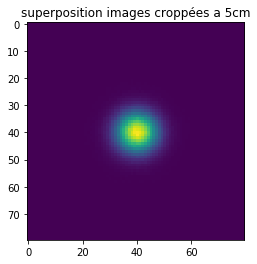

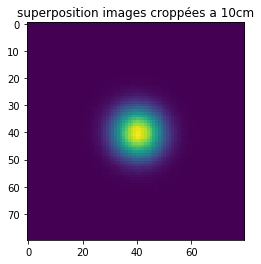

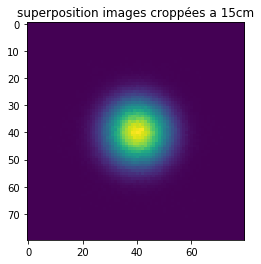

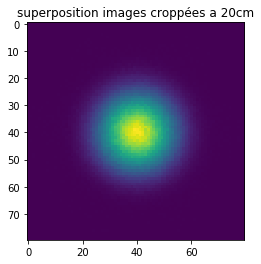

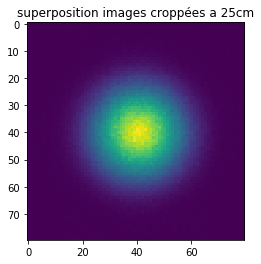

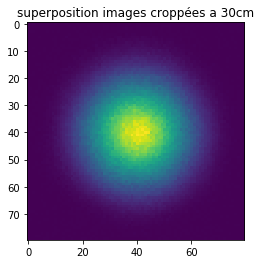

In [7]:
# Ici j'ai simplifié ton code car il n'était pas nécessaire d'avoir autant de variables, 
# tout reste en mémoire après et ca prend de la RAM (ralentissement de l'ordinateur 
# ou même crash si il y en a trop)

##### distance de 5cm #####
partiestot0 = cropImg(img0) + cropImg(img1) + cropImg(img2) + cropImg(img3) + cropImg(img4)
plt.title('superposition images croppées a 5cm')
plt.imshow(partiestot0)
plt.show()

##### distance de 10cm #####
partiestot1 = cropImg(img01) + cropImg(img11) + cropImg(img21) + cropImg(img31) + cropImg(img41)
plt.title('superposition images croppées a 10cm')
plt.imshow(partiestot1)
plt.show()

##### distance de 15cm #####
partiestot2 = cropImg(img02) + cropImg(img12) + cropImg(img22) + cropImg(img32) + cropImg(img42)
plt.title('superposition images croppées a 15cm')
plt.imshow(partiestot2)
plt.show()

##### distance de 20cm #####
partiestot3 = cropImg(img03) + cropImg(img13) + cropImg(img23) + cropImg(img33) + cropImg(img43)
plt.title('superposition images croppées a 20cm')
plt.imshow(partiestot3)
plt.show()

##### distance de 25cm #####
partiestot4 = cropImg(img04) + cropImg(img14) + cropImg(img24) + cropImg(img34) + cropImg(img44)
plt.title('superposition images croppées a 25cm')
plt.imshow(partiestot4)
plt.show()

##### distance de 30cm #####
partiestot5 = cropImg(img05) + cropImg(img15) + cropImg(img25) + cropImg(img35) + cropImg(img45)
plt.title('superposition images croppées a 30cm')
plt.imshow(partiestot5)
plt.show()

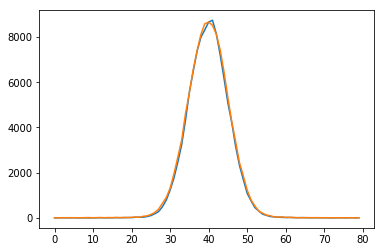

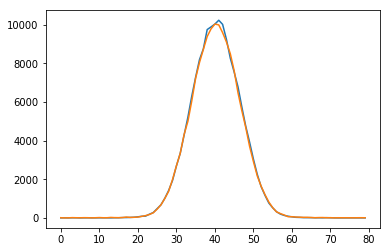

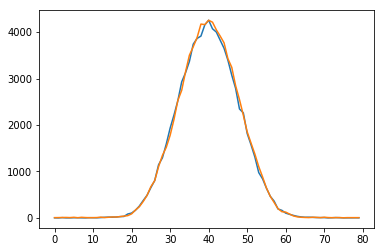

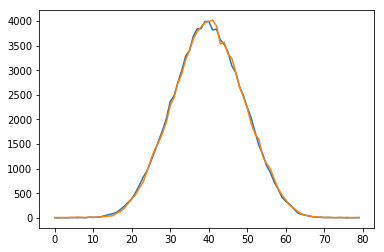

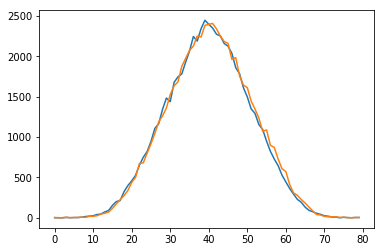

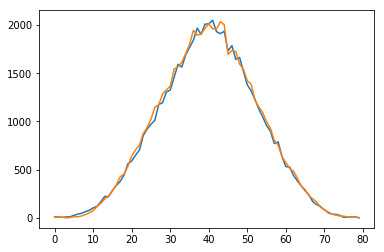

In [8]:
# La pareil il n'est pas nécessaire d'avoir autant de variables...

##### distance de 5cm #####
plt.plot(partiestot0[:,40])
plt.plot(partiestot0[40,:])
plt.show()

##### distance de 10cm #####
plt.plot(partiestot1[:,40])
plt.plot(partiestot1[40,:])
plt.show()

##### distance de 15cm #####
plt.plot(partiestot2[:,40])
plt.plot(partiestot2[40,:])
plt.show()

##### distance de 20cm #####
plt.plot(partiestot3[:,40])
plt.plot(partiestot3[40,:])
plt.show()

##### distance de 25cm #####
plt.plot(partiestot4[:,40])
plt.plot(partiestot4[40,:])
plt.show()

##### distance de 30cm #####
plt.plot(partiestot5[:,40])
plt.plot(partiestot5[40,:])
plt.show()


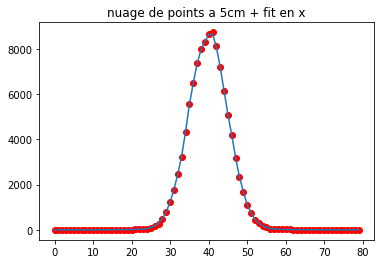

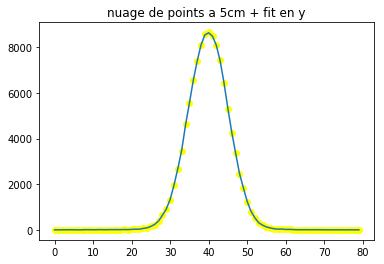

In [9]:
##### distance de 5cm #####
abcisse = np.arange(0, 80, 1)

# Je trouve mieux d'afficher le nuage de point et par dessus la courbe de fit
# pour être sûr que ca fonctionne bien...
# Donc ici en x
plt.title('nuage de points a 5cm + fit en x')
plt.scatter(abcisse, partiestot0[:,40], c = 'red')
FITX = scipy.ndimage.filters.gaussian_filter(partiestot0[:,40], 0.5, mode='nearest')
plt.plot(FITX)
plt.show()

# et en y:
plt.title('nuage de points a 5cm + fit en y')
plt.scatter(abcisse, partiestot0[40,:], c = 'yellow')
FITY = scipy.ndimage.filters.gaussian_filter(partiestot0[40,:], 0.5, mode='nearest')
plt.plot(FITY)
plt.show()

# on voit beaucoup mieux si ton fit est bon et je ne suis pas sur qu'il soit parfait...
# par contre ce que tu as fait est un filtrage gaussien et non pas un fit avec une gaussienne 
# ce n'est pas du tout la meme chose
# mais tu peux continuer sur ce code...

In [10]:
# abcisse est déjà défini avant donc pas la peine de le refaire...
#abcisse = np.arange(0, 80, 1)

# ici tu repars du nuage de point et c'est une bonne information mais il pourrait 
# etre interessant de repartir de l'équation du fit pour comparer...
# mais pour ca il faut effectivement fitter avec une gaussienne et récupérer 
# l'équation de la gaussienne...

# pour finir j'ai déjà multiplié ici par la taille de pixel pour éviter de le faire 
# après et pour compacter un peu le code...
# la valeur en pixel a peu d'intérêt...

##### distance de 5cm #####
halfmaxtotx = half_max(abcisse, partiestot0[:,40])
halfmaxtoty = half_max(abcisse, partiestot0[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop = (halfmaxtotx[1] - halfmaxtotx[0]) * float(pixSize[0])
fwhmYcrop = (halfmaxtoty[1] - halfmaxtoty[0]) * float(pixSize[1])
#print('la mis hauteur de l image totale cropée en x est =',halfmaxtotx)
#print('la mis hauteur de l image totale cropée en y est =',halfmaxtoty)
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop = ', fwhmXcrop, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop = ', fwhmYcrop, 'mm')


##### distance de 10cm #####
halfmaxtotx1 = half_max(abcisse, partiestot1[:,40])
halfmaxtoty1 = half_max(abcisse, partiestot1[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop1 = (halfmaxtotx1[1] - halfmaxtotx1[0]) * float(pixSize[0])
fwhmYcrop1 = (halfmaxtoty1[1] - halfmaxtoty1[0]) * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop = ', fwhmXcrop1, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop = ', fwhmYcrop1, 'mm')


##### distance de 15cm #####
halfmaxtotx2 = half_max(abcisse, partiestot2[:,40])
halfmaxtoty2 = half_max(abcisse, partiestot2[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop2 = (halfmaxtotx2[1] - halfmaxtotx2[0]) * float(pixSize[0])
fwhmYcrop2 = (halfmaxtoty2[1] - halfmaxtoty2[0]) * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop = ', fwhmXcrop2, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop = ', fwhmYcrop2, 'mm')


##### distance de 20cm #####
halfmaxtotx3 = half_max(abcisse, partiestot3[:,40])
halfmaxtoty3 = half_max(abcisse, partiestot3[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop3 = (halfmaxtotx3[1] - halfmaxtotx3[0]) * float(pixSize[0])
fwhmYcrop3 = (halfmaxtoty3[1] - halfmaxtoty3[0]) * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop = ', fwhmXcrop3, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop = ', fwhmYcrop3, 'mm')


##### distance de 25cm #####
halfmaxtotx4 = half_max(abcisse, partiestot4[:,40])
halfmaxtoty4 = half_max(abcisse, partiestot4[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop4 = (halfmaxtotx4[1] - halfmaxtotx4[0]) * float(pixSize[0])
fwhmYcrop4 = (halfmaxtoty4[1] - halfmaxtoty4[0]) * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop = ', fwhmXcrop4, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop = ', fwhmYcrop4, 'mm')


##### distance de 30cm #####
halfmaxtotx5 = half_max(abcisse, partiestot5[:,40])
halfmaxtoty5 = half_max(abcisse, partiestot5[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop5 = (halfmaxtotx5[1] - halfmaxtotx5[0]) * float(pixSize[0])
fwhmYcrop5 = (halfmaxtoty5[1] - halfmaxtoty5[0]) * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop = ', fwhmXcrop5, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmYcrop = ', fwhmYcrop5, 'mm')

la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop =  6.507943469280051 mm
la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop =  6.727502316461111 mm
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop =  8.145148148309458 mm
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop =  8.067061387852396 mm
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop =  10.275069826681396 mm
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop =  10.056699615141307 mm
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop =  12.284871495585664 mm
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop =  11.892449155896788 mm
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop =  13.904922260067252 mm
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop =  14.341284144736841 mm
la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop =  15.55

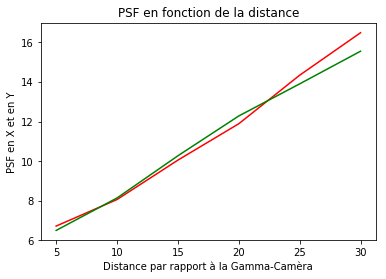

In [11]:
Distance = np.array([5, 10, 15, 20, 25, 30])
PSFX = np.array([fwhmXcrop, fwhmXcrop1, fwhmXcrop2, fwhmXcrop3, fwhmXcrop4, fwhmXcrop5])
PSFY = np.array([fwhmYcrop, fwhmYcrop1, fwhmYcrop2, fwhmYcrop3, fwhmYcrop4, fwhmYcrop5])

plt.title('PSF en fonction de la distance')
plt.plot(Distance, PSFY, c = 'red')
plt.plot(Distance, PSFX, c = 'green')
plt.xlabel("Distance par rapport à la Gamma-Camèra")
plt.ylabel("PSF en X et en Y")
plt.show()


In [12]:
# Les deux courbes sont un peu bruitees semblerait il... Peut etre que le 
# fitting avec une gaussienne va aider...
# si ce n'est pas le cas, on va de toute facon faire la moyenne des résultats
# entre les deux directions